# Lab 11: Fashion MNIST Classification Notebook

In [1]:
%pip install tensorflow matplotlib 


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Lab11 : Fashion MNIST Classification.
# Realisé par : Mohammed Bousmah EMSI 2023-2025
# Reference : https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb#scrollTo=dzLKpmZICaWN

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.20.0


# Setp1 : Dataset

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape)
print(train_labels.shape)
print(np.unique(train_labels))
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
[0 1 2 3 4 5 6 7 8 9]
(10000, 28, 28)
(10000,)


# Step 2 : Model

### Normalisation des données

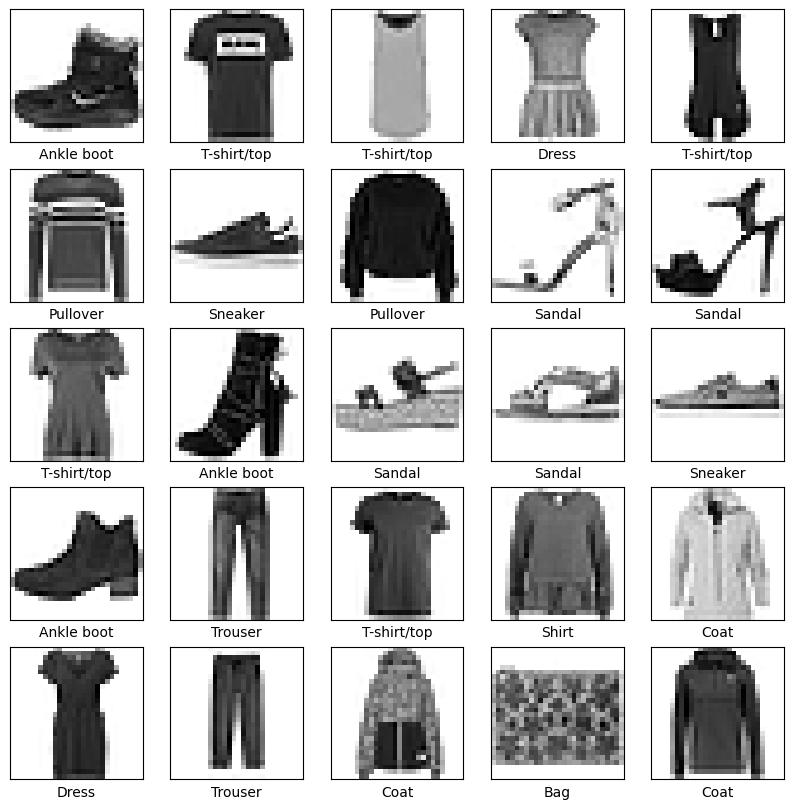

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# STEP2 : Model

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


c:\Users\USER\OneDrive\Desktop\LAB DeepLearning\NADIRI_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Description du modèle

Le modèle possède trois couches principales :

## 1. Flatten
Cette couche transforme le tableau 2D de pixels 28×28 en un tableau 1D unique de 28×28 = 784 pixels.
Elle agit comme couche d’entrée du réseau.

## 2. Dense (couche cachée)
- C’est une couche entièrement connectée avec 128 neurones.
- La fonction d’activation ReLU (Rectified Linear Unit) introduit de la non-linéarité, ce qui permet au modèle d’apprendre des motifs complexes dans les images.

## 3. Dense (couche de sortie)
- Une couche entièrement connectée avec 10 neurones, un par classe de vêtement.
- La sortie de cette couche correspond aux logits du modèle (prédictions brutes non normalisées).

# Compilation

- `optimizer='adam'` : définit comment le modèle se met à jour en fonction des données et de la fonction de perte. Adam est un optimiseur populaire et efficace.
- `loss=...Crossentropy` : fonction que le modèle cherche à minimiser lors de l’entraînement. Elle mesure l’écart entre les prédictions et les vraies étiquettes. On utilise `from_logits=True` car la couche de sortie fournit des logits bruts.
- `metrics=['accuracy']` : métrique utilisée pour suivre l’entraînement et le test. Elle mesure la fraction d’images correctement classées.


# Step 3 : Train

In [7]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8239 - loss: 0.5025


# Step 4 : Test

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.8442 - loss: 0.4332

Test accuracy: 0.8442000150680542


# Évaluation du modèle

Puisque le code utilise `verbose=2`, la sortie sera concise, affichant **la perte finale (`test_loss`) et la précision finale (`test_acc`)** sur une seule ligne après que toutes les données de test ont été traitées.

- `verbose=0` -- silencieux  
- `verbose=1` -- barre de progression classique Keras, affichant l’avancement pour chaque batch (par défaut pour l’entraînement)  
- `verbose=2` -- affichage succinct (une ligne par époque ou test)

Nous utilisons `model.evaluate` sur `test_images` et `test_labels`.  
Ces données **n’ont pas été utilisées pendant l’entraînement**, donc elles donnent une évaluation honnête de la capacité de généralisation du modèle.

- `test_loss` : valeur de la fonction de perte sur les données de test.  
- `test_acc` : précision sur les données de test (pourcentage d’images correctement classées).

> La précision du modèle sur le test sera généralement légèrement inférieure à celle de l’entraînement, ce qui est normal et indique un certain degré de **surapprentissage** (le modèle a appris trop spécifiquement les données d’entraînement).


### Make Predictions

In [9]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# Fonction d'activation Softmax

La fonction d’activation **Softmax** a pour rôle de transformer les logits bruts et non normalisés en un ensemble de **probabilités interprétables**.

## Transformation

Lorsqu’on ajoute la couche `tf.keras.layers.Softmax()`, elle effectue la transformation suivante sur les 10 logits :

- **Exponentiation** : elle calcule l’exponentielle de chaque logit, ce qui rend toutes les valeurs positives.  
- **Normalisation** : chaque valeur exponentiée est divisée par la somme de toutes les valeurs exponentiées.

## Caractéristiques de la sortie

Le résultat de la fonction Softmax est un tableau de 10 nombres (probabilités) qui respectent deux conditions clés :

- **Plage** : chaque valeur est comprise entre 0 et 1.  
- **Somme** : les 10 valeurs s’additionnent exactement à 1.


#### Visualization Functions and Plotting

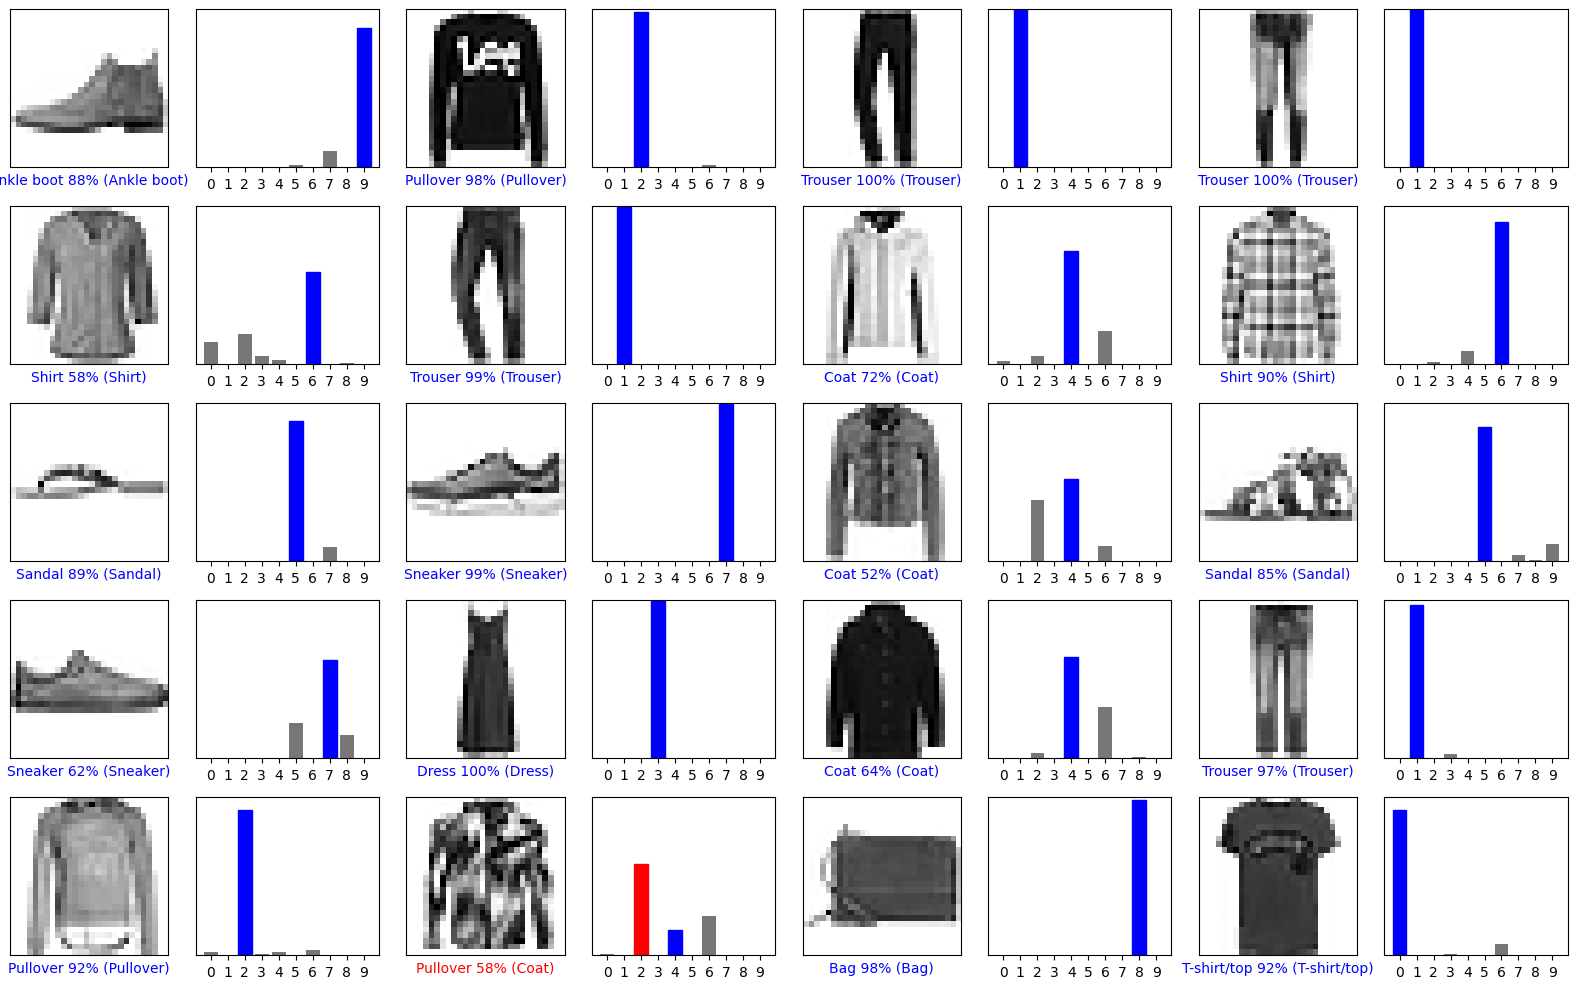

In [10]:
def plot_image(i, predictions_array, true_labels, images):
  true_label, img = true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_labels):
  true_label = true_labels[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  # Plot the first X test images, their predicted labels, and the true labels.
  # Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [10]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images, train_labels,
    epochs=15,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8222 - loss: 0.4985 - val_accuracy: 0.8457 - val_loss: 0.4223
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8667 - loss: 0.3648 - val_accuracy: 0.8552 - val_loss: 0.4073
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8783 - loss: 0.3309 - val_accuracy: 0.8678 - val_loss: 0.3688
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8884 - loss: 0.3022 - val_accuracy: 0.8783 - val_loss: 0.3346
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8934 - loss: 0.2866 - val_accuracy: 0.8803 - val_loss: 0.3264
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8997 - loss: 0.2714 - val_accuracy: 0.8865 - val_loss: 0.3084
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9029 - loss: 0.2572 - val_accuracy: 0.8763 - val_loss: 0.3494
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9071 - loss: 0.2472 - val_accuracy: 0.

In [11]:
print(train_images.shape, train_labels.shape)
print(train_images.dtype, train_labels.dtype)


(60000, 28, 28) (60000,)
float64 uint8


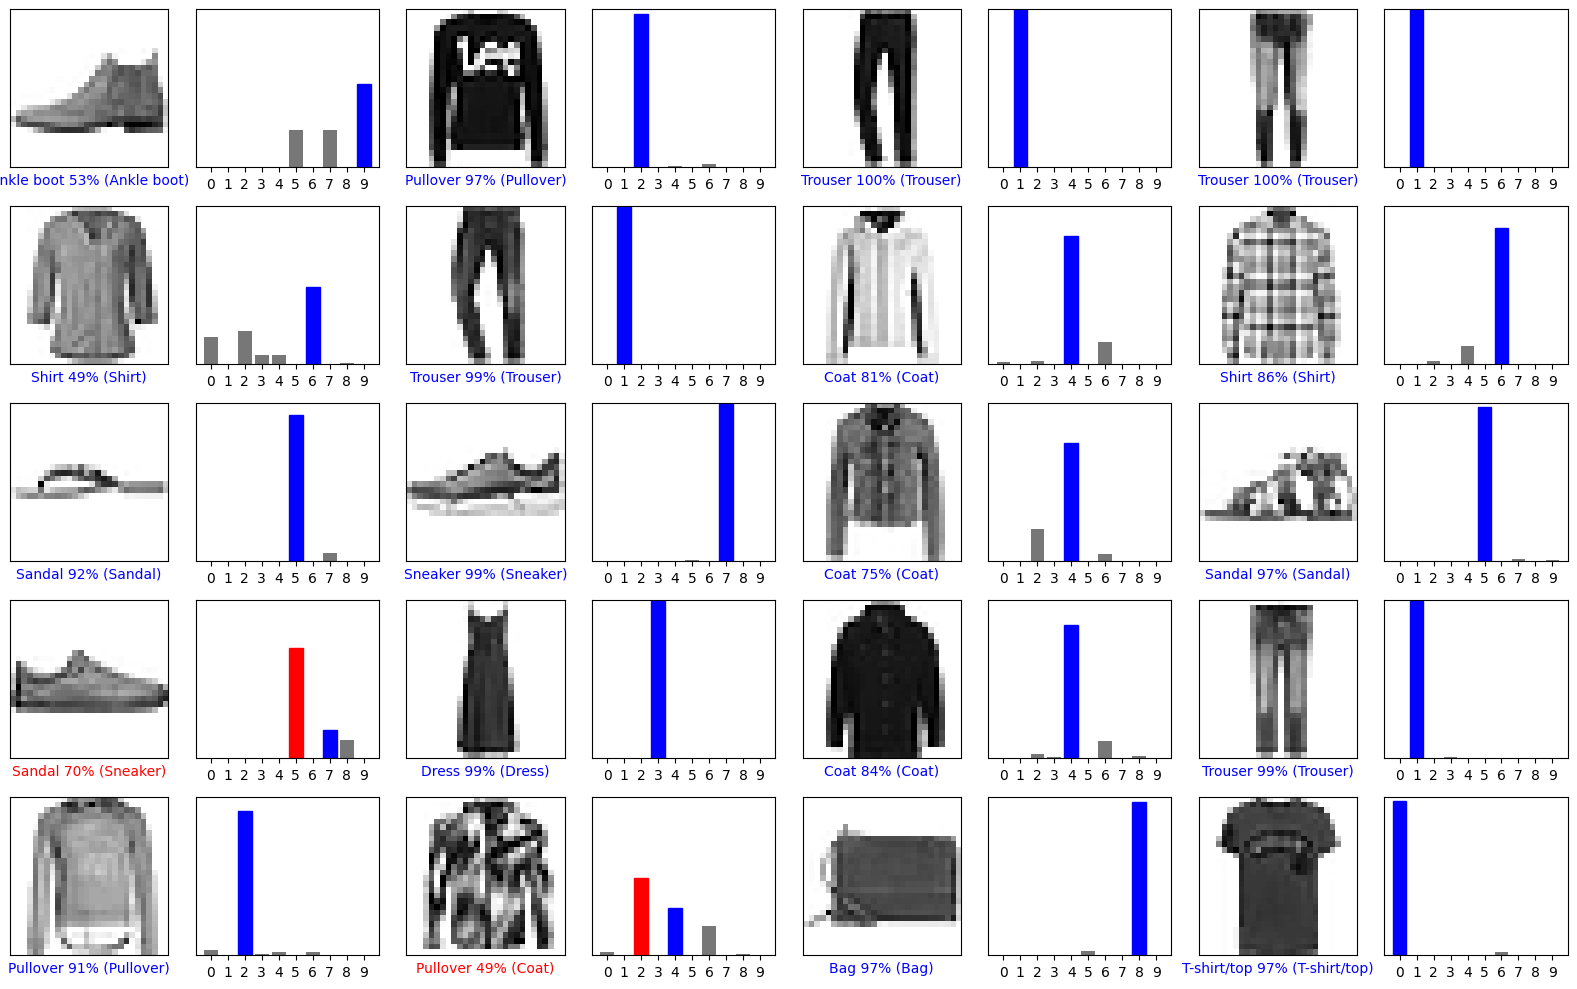

In [12]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()